In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start='2014-01-01'
end='2024-12-12'
stock='GOOG'
data=yf.download(stock,start,end)

/tmp/ipython-input-526924590.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-01-02,27.560261,27.674898,27.439930,27.618199,73129082
2014-01-03,27.359213,27.654593,27.357480,27.606808,66917888
2014-01-06,27.664251,27.702380,27.394868,27.557538,71037271
2014-01-07,28.197567,28.218119,27.759326,27.854402,102486711
2014-01-08,28.256250,28.407036,28.059659,28.374353,90036218


In [ ]:
data.isna().sum().sum()

np.int64(0)

In [ ]:
data.nunique()

,,0
Price,Ticker,
Close,GOOG,2715
High,GOOG,2754
Low,GOOG,2755
Open,GOOG,2755
Volume,GOOG,2670


In [ ]:
data.shape

(2755, 5)

In [ ]:
data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [ ]:
ma_100_days=data.Close.rolling(100).mean()

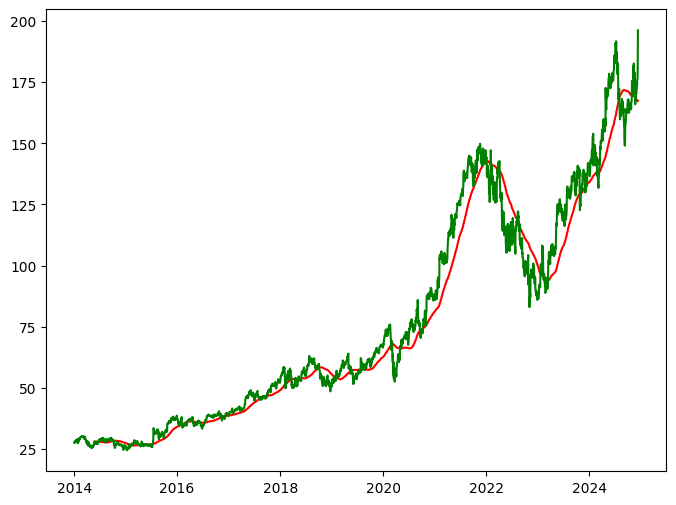

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [ ]:
data_train

Ticker,GOOG
Date,
2014-01-02,27.560261
2014-01-03,27.359213
2014-01-06,27.664251
2014-01-07,28.197567
2014-01-08,28.256250
...,...
2022-09-27,97.510384
2022-09-28,100.144722
2022-09-29,97.510384


In [ ]:
data_train.shape[0]

2204

In [ ]:
data_test.shape[0]

551

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1 ))

In [ ]:
data_train_scale=scaler.fit_transform(data_train)

In [ ]:
x=[]
y=[]
for i in range (100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [ ]:
x,y= np.array(x),np.array(y)

In [ ]:
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [ ]:
model =Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 167ms/step - loss: 0.0600
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - loss: 0.0070
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 164ms/step - loss: 0.0051
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - loss: 0.0067
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 163ms/step - loss: 0.0053
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - loss: 0.0050
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0043
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - loss: 0.0040
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - loss: 0.0042
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 158ms/step - loss: 0.0036
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0040
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0046
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - loss: 0.0034
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0036
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days=data_train.tail(100)

In [ ]:


data.test =pd.concat((pas_100_days,data_test),ignore_index=True)

/tmp/ipython-input-1920428301.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.test =pd.concat((pas_100_days,data_test),ignore_index=True)


In [ ]:
data_test_scale =scaler.fit_transform(data_test)

In [ ]:
x=[]
y=[]
for i in range (100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y =np.array(x),np.array(y)

In [ ]:
y_predict =model.predict(x)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


In [ ]:
scale=1/scaler.scale_

In [ ]:
y_predict =y_predict*scale

In [ ]:
y=y*scale

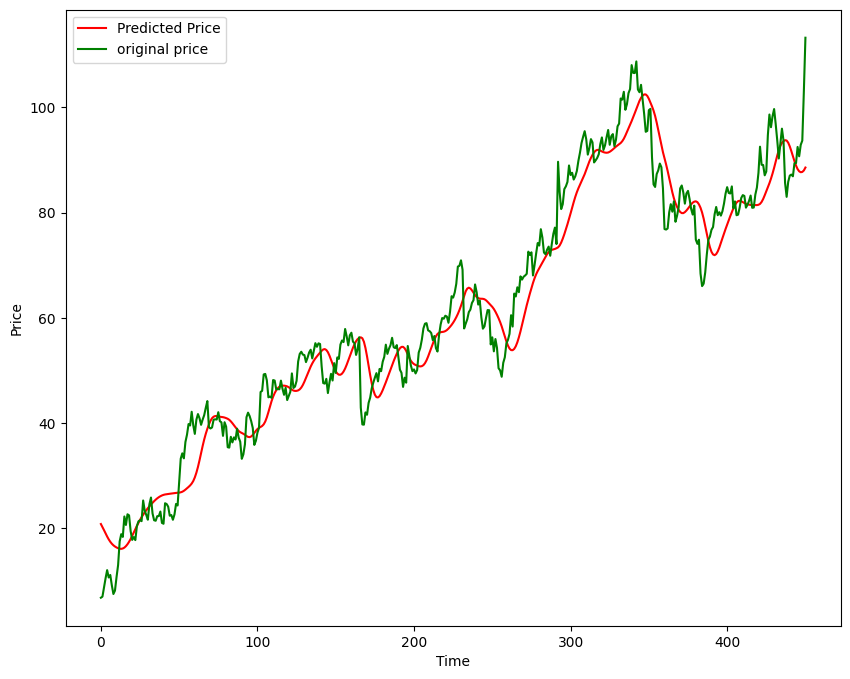

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='original price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()